0        79.0
1        76.0
2        82.0
3        62.0
4        61.0
         ... 
14413    57.0
14414    32.0
14415    29.0
14416    26.0
14417    23.0
Name: age, Length: 14418, dtype: float64
0           old
1           old
2           old
3           old
4           old
          ...  
14413    middle
14414    middle
14415     young
14416     young
14417     young
Name: ageg, Length: 14418, dtype: object
          region    ageg  proportion
0          강원/충북     old        50.9
1          강원/충북  middle        28.8
2          강원/충북   young        20.2
3   광주/전남/전북/제주도     old        49.2
4   광주/전남/전북/제주도  middle        30.7
5   광주/전남/전북/제주도   young        20.0
6          대구/경북     old        55.3
7          대구/경북  middle        28.1
8          대구/경북   young        16.7
9          대전/충남     old        45.4
10         대전/충남  middle        33.0
11         대전/충남   young        21.6
12      부산/경남/울산     old        49.4
13      부산/경남/울산  middle        31.4
14      부산/경남/울산   young        1

<Axes: xlabel='proportion', ylabel='region'>

findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
C:\DEV\Program\anaconda\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 44053 (\N{HANGUL SYLLABLE GANG}) missing from current font.
  func(*args, **kwargs)
C:\DEV\Program\anaconda\lib\site-packages\IPython\core\events.py:89: UserWar

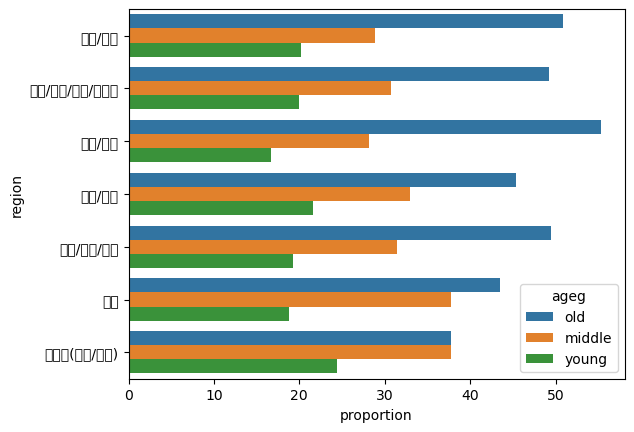

In [34]:
# 데이터 분석 프로젝트 chapter09 p -224
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# sns 한글깨짐 수정
plt.rcParams['font.family'] = 'NanumGothic'

#데이터 불러오기
raw_welfare = pd.read_spss('Koweps_hpwc14_2019_beta2.sav')

#복사본 만들기
welfare = raw_welfare.copy()
# welfare
# print(welfare.shape) # 행, 열 갯수 출력
# print(welfare.info()) # 변수 속성 출력
# print(welfare.describe()) # 요약 통계량

# 알아보기 쉬운 변수로 바꾸기
welfare = welfare.rename(
        columns = { 'h14_g3' : 'sex',            # 성별
                    'h14_g4' : 'birth',          # 태어난 연도
                    'h14_g10' : 'marriage_type', # 혼인상태
                    'h14_g11' : 'religion',      # 종교
                    'p1402_8aq1' : 'income',     # 일한달의 월 평균 임금
                    'h14_eco9' : 'code_job',     # 직업 코드
                    'h14_reg7' : 'code_region'}) # 지역 코드

# row 생략 없이 출력
# pd.set_option('display.max_rows', None)
# col 생략 없이 출력
# pd.set_option('display.max_columns', None)

# 지역 코드 목록 만들기
list_region = pd.DataFrame({'code_region': [1,2,3,4,5,6,7],
                            'region'      : ['서울',
                                             '수도권(인천/경기)',
                                             '부산/경남/울산',
                                             '대구/경북',
                                             '대전/충남',
                                             '강원/충북',
                                             '광주/전남/전북/제주도' ]})
list_region
# 지역별 변수 추가 merge - join의 효과
welfare = welfare.merge(list_region, how='left', on='code_region')
# print(welfare.info())
welfare[['code_region', 'region']].head(20)
# 나이 변수 만들기
welfare = welfare.assign(age = 2023 - welfare['birth'] + 1) 
print(welfare['age'])
# 2. 연령대별 변수 만들기
welfare = welfare.assign(ageg = np.where(welfare['age'] < 30, 'young',
                                np.where(welfare['age'] <= 59, 'middle', 'old' )))
print(welfare['ageg'])
# 3. 지역별 연령대 비율표 만들기
region_ageg = welfare.groupby('region', as_index = False)['ageg'].value_counts(normalize=True)
# print(region_ageg)

# 4. 그래프로 만들기
# 4-1 백분율로 바꾸기
# 4-2 반올림
region_ageg = region_ageg.assign(proportion = region_ageg['proportion'] * 100).round(1)
print(region_ageg)

sns.barplot(data = region_ageg, y = 'region', x = 'proportion', hue = 'ageg' )

